1.  Combine all blocks into a single dataframe- keeping on relevant columns.
2. Use day-level energy consumption data per household to normalize data for inconsistent household count
3. Explore relationships between weather conditions and energy consumptions.
4. Add UK holidays data to the day level data as an indicator.


# Daily Energy Data Preparation

**Importing Libraries **

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
plt.style.use("ggplot")
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)


import warnings
warnings.filterwarnings("ignore")

### Energy Data

> We are predicting for energy demand in the future- therefore we are taking only energy sum i.e. total energy use per day for a given household.

In [ ]:
def clean_df(df_unit):
    df_unit.columns = ["LCLid", "DateTime", "energy"]

    df_unit["DateTime"] = pd.to_datetime(df_unit["DateTime"], errors='coerce')

    # Extract the date part and convert it to datetime
    df_unit.loc[:, "date"] = df_unit["DateTime"].dt.date
    df_unit['date'] = pd.to_datetime(df_unit['date'], format='%Y-%m-%d')

    # Convert energy to float
    df_unit = df_unit[df_unit["energy"] != "Null"]
    df_unit.loc[:,"energy"] = df_unit["energy"].astype("float64")

    # Compute energy sum
    df_unit = df_unit.groupby(['date', 'LCLid'])['energy'].sum().reset_index()
    df_unit.rename(columns={'energy': 'energy_sum'}, inplace=True)
    return df_unit

In [ ]:
# Combining all blocks

df_list = []

for num in range(0,112):
    df_unit = pd.read_csv("../data/archive/halfhourly_dataset/block_"+str(num)+".csv")
    df_unit = clean_df(df_unit)
    df_list.append(df_unit)

df = pd.concat(df_list, axis=0, ignore_index=True)
df.to_csv("../data/final/energy.csv", index=False)


### Energy at Day Level

In [4]:
energy = pd.read_csv("../data/final/energy.csv")

In [5]:
energy.head(5)

,date,LCLid,energy_sum
0,2011-12-03,MAC000246,9.007
1,2011-12-04,MAC000246,20.763
2,2011-12-05,MAC000246,6.020
3,2011-12-06,MAC000246,13.322
4,2011-12-07,MAC000246,9.062


In [6]:
energy.LCLid.unique()

array(['MAC000246', 'MAC004387', 'MAC004431', ..., 'MAC003652',
       'MAC003860', 'MAC003884'], dtype=object)

In [7]:
energy.shape

(3510403, 3)

In [8]:
energy['date'] = pd.to_datetime(energy['date'], format='%Y-%m-%d').dt.date

## Weather Information
Daily level weather information is taken using darksky api in the dataset[](http://)

In [9]:
weather = pd.read_csv('../data/archive/weather_daily_darksky.csv')
weather.head(4)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25


In [10]:
weather.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [11]:
# Convert datetime to time

weather['date']=  pd.to_datetime(weather['time']) # date is given as timestamp
weather['date']=  pd.to_datetime(weather['date'],format='%Y%m%d').dt.date

In [12]:
weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,date
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52,2011-11-11
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53,2011-12-11
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10,2011-12-27
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25,2011-12-02
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99,2011-12-24


In [14]:
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','date']]
weather = weather.dropna()

In [15]:
weather.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,13.662747,195.712826,6.529750,0.477605,3.577696,1014.151158,12.726016,11.168524,0.781782,6.088138,12.931271,2.542565,7.711169,7.415096,13.545471,5.740942,0.501487
std,6.185761,89.391048,4.833612,0.193514,1.690570,11.057077,7.283022,2.467169,0.095366,6.034694,7.109260,1.832985,4.873611,4.891550,6.263084,6.051567,0.286707
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.490000,120.000000,3.180000,0.350000,2.370000,1007.450000,7.030000,10.350000,0.720000,1.510000,7.330000,1.000000,3.980000,3.700000,9.210000,1.100000,0.260000
50%,12.630000,219.000000,6.370000,0.470000,3.440000,1014.620000,12.480000,11.970000,0.790000,5.320000,12.630000,2.000000,7.540000,7.100000,12.480000,4.890000,0.500000
75%,17.920000,255.000000,10.060000,0.600000,4.570000,1021.760000,17.920000,12.830000,0.860000,11.470000,17.920000,4.000000,11.470000,11.280000,17.920000,11.280000,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


## UK Bank Holidays

In [16]:
holiday = pd.read_csv('../data/archive/uk_bank_holidays.csv')
holiday.rename(columns={"Bank holidays":"date"})
holiday.columns = ["date","Type"]

In [17]:
holiday['date'] = pd.to_datetime(holiday['date'],format='%Y-%m-%d').dt.date
holiday.head(4)

,date,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)


In [18]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    25 non-null     object
 1   Type    25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes


## Household Information

In [19]:
household_info=pd.read_csv("../data/archive/informations_households.csv")

In [20]:
household_info.head(7)

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
5,MAC003579,Std,ACORN-A,Affluent,block_0
6,MAC003566,Std,ACORN-A,Affluent,block_0


In [21]:
household_info.Acorn_grouped.unique()

array(['ACORN-', 'Affluent', 'Comfortable', 'Adversity', 'ACORN-U'],
      dtype=object)

In [22]:
len(household_info)

5566

### Merging Weather and energy

In [23]:
weather_energy =  energy.merge(weather,on='date')
weather_energy.head(2)

,date,LCLid,energy_sum,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-12-03,MAC000246,9.007,11.42,247,6.58,0.54,5.42,1003.55,11.42,12.7,0.79,4.9,11.42,1.0,7.53,8.12,11.42,4.71,0.28
1,2011-12-03,MAC000193,1.392,11.42,247,6.58,0.54,5.42,1003.55,11.42,12.7,0.79,4.9,11.42,1.0,7.53,8.12,11.42,4.71,0.28


In [24]:
weather_energy.shape

(3501189, 20)

In [ ]:
weather_energy.to_csv("../data/final/weather_energy.csv",index=False)

### Merge weather_energy with holiday

In [25]:
weather_energy_holiday = weather_energy.merge(holiday, on = 'date',how = 'left')

In [26]:
weather_energy_holiday.head(4)

,date,LCLid,energy_sum,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Type
0,2011-12-03,MAC000246,9.007,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,0.79,4.9,11.42,1.0,7.53,8.12,11.42,4.71,0.28,NaN
1,2011-12-03,MAC000193,1.392,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,0.79,4.9,11.42,1.0,7.53,8.12,11.42,4.71,0.28,NaN
2,2011-12-03,MAC000194,16.756,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,0.79,4.9,11.42,1.0,7.53,8.12,11.42,4.71,0.28,NaN
3,2011-12-03,MAC000155,15.080,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,0.79,4.9,11.42,1.0,7.53,8.12,11.42,4.71,0.28,NaN


In [27]:
# Adding holiday as 1 else 0
weather_energy_holiday['Isholiday'] = weather_energy_holiday['Type'].notna().astype(int)

In [28]:
# Convert 'date' to datetime and extract the day of the week
weather_energy_holiday['DayOfWeek'] = pd.to_datetime(weather_energy_holiday['date']).dt.dayofweek  # Monday = 0, Sunday = 6

# Directly assign 1 for weekends (Saturday = 5, Sunday = 6) and 0 otherwise
weather_energy_holiday['Isweekend'] = weather_energy_holiday['DayOfWeek'].isin([5, 6]).astype(int)


In [29]:
weather_energy_holiday.head(7)

,date,LCLid,energy_sum,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Type,Isholiday,DayOfWeek,Isweekend
0,2011-12-03,MAC000246,9.007,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,1.0,7.53,8.12,11.42,4.71,0.28,NaN,0,5,1
1,2011-12-03,MAC000193,1.392,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,1.0,7.53,8.12,11.42,4.71,0.28,NaN,0,5,1
2,2011-12-03,MAC000194,16.756,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,1.0,7.53,8.12,11.42,4.71,0.28,NaN,0,5,1
3,2011-12-03,MAC000155,15.080,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,1.0,7.53,8.12,11.42,4.71,0.28,NaN,0,5,1
4,2011-12-03,MAC000186,3.411,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,1.0,7.53,8.12,11.42,4.71,0.28,NaN,0,5,1
5,2011-12-03,MAC000219,6.996,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,1.0,7.53,8.12,11.42,4.71,0.28,NaN,0,5,1
6,2011-12-03,MAC000165,6.421,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,1.0,7.53,8.12,11.42,4.71,0.28,NaN,0,5,1


In [30]:
weather_energy_holiday.drop(['Type','DayOfWeek'],axis=1,inplace=True)

In [31]:
weather_energy_holiday.head(4)

,date,LCLid,energy_sum,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Isholiday,Isweekend
0,2011-12-03,MAC000246,9.007,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,4.9,11.42,1.0,7.53,8.12,11.42,4.71,0.28,0,1
1,2011-12-03,MAC000193,1.392,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,4.9,11.42,1.0,7.53,8.12,11.42,4.71,0.28,0,1
2,2011-12-03,MAC000194,16.756,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,4.9,11.42,1.0,7.53,8.12,11.42,4.71,0.28,0,1
3,2011-12-03,MAC000155,15.080,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,4.9,11.42,1.0,7.53,8.12,11.42,4.71,0.28,0,1


In [32]:
weather_energy_holiday["IsBankHoliday"] = weather_energy_holiday["Isholiday"] | weather_energy_holiday["Isweekend"]

In [33]:
weather_energy_holiday.head()

,date,LCLid,energy_sum,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Isholiday,Isweekend,IsBankHoliday
0,2011-12-03,MAC000246,9.007,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,11.42,1.0,7.53,8.12,11.42,4.71,0.28,0,1,1
1,2011-12-03,MAC000193,1.392,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,11.42,1.0,7.53,8.12,11.42,4.71,0.28,0,1,1
2,2011-12-03,MAC000194,16.756,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,11.42,1.0,7.53,8.12,11.42,4.71,0.28,0,1,1
3,2011-12-03,MAC000155,15.080,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,11.42,1.0,7.53,8.12,11.42,4.71,0.28,0,1,1
4,2011-12-03,MAC000186,3.411,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,11.42,1.0,7.53,8.12,11.42,4.71,0.28,0,1,1


In [34]:
weather_energy_holiday.drop(['Isholiday','Isweekend'],axis=1,inplace=True)

In [35]:
weather_energy_holiday.shape

(3501189, 21)

In [ ]:
weather_energy_holiday.to_csv("../data/final/weather_energy_holiday.csv",index=False)

### Merge weather_energy_holiday with household data

In [36]:
final_df = weather_energy_holiday.merge(household_info,on="LCLid",how="left")

In [37]:
final_df.shape

(3501189, 25)

In [38]:
final_df.columns

Index(['date', 'LCLid', 'energy_sum', 'temperatureMax', 'windBearing',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'IsBankHoliday', 'stdorToU',
       'Acorn', 'Acorn_grouped', 'file'],
      dtype='object')

In [39]:
final_df.head()

,date,LCLid,energy_sum,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,IsBankHoliday,stdorToU,Acorn,Acorn_grouped,file
0,2011-12-03,MAC000246,9.007,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,Std,ACORN-A,Affluent,block_0
1,2011-12-03,MAC000193,1.392,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,ToU,ACORN-D,Affluent,block_7
2,2011-12-03,MAC000194,16.756,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,ToU,ACORN-D,Affluent,block_7
3,2011-12-03,MAC000155,15.080,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,Std,ACORN-D,Affluent,block_11
4,2011-12-03,MAC000186,3.411,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,ToU,ACORN-E,Affluent,block_19


##### Assuming ACORN Category 'Acorn-U' and 'Acorn-' as NotPrivateHouseholds

In [40]:
final_df['AcornCategory']=pd.DataFrame(["AffluentAcheivers" if i in ['ACORN-A', 'ACORN-B', 'ACORN-C'] 
                                       else "RisingProsperity" if i in ['ACORN-D', 'ACORN-E'] 
                                       else "ComfortableCommunities" if i in ['ACORN-F', 'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J'] 
                                       else "FinanciallyStretched" if i in ['ACORN-K','ACORN-L', 'ACORN-M', 'ACORN-N']
                                       else "UrbanAdversity" if i in ['ACORN-O', 'ACORN-P', 'ACORN-Q']
                                       else "NotPrivateHouseholds" if i in ['ACORN-U','ACORN-'] else i for i in final_df.Acorn])

In [41]:
final_df.drop(['Acorn_grouped'],axis=1,inplace=True)

In [42]:
final_df.rename(columns={"Acorn":"AcornGroup","stdorToU":"Tariff"},inplace=True)

In [43]:
final_df.head()

,date,LCLid,energy_sum,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,IsBankHoliday,Tariff,AcornGroup,file,AcornCategory
0,2011-12-03,MAC000246,9.007,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,Std,ACORN-A,block_0,AffluentAcheivers
1,2011-12-03,MAC000193,1.392,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,ToU,ACORN-D,block_7,RisingProsperity
2,2011-12-03,MAC000194,16.756,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,ToU,ACORN-D,block_7,RisingProsperity
3,2011-12-03,MAC000155,15.080,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,Std,ACORN-D,block_11,RisingProsperity
4,2011-12-03,MAC000186,3.411,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,ToU,ACORN-E,block_19,RisingProsperity


In [44]:
final_df['AcornGroup'] = final_df['AcornGroup'].map({
    'ACORN-A': 'LavishLifestyles',
    'ACORN-': 'NotPrivateHouseholds',
    'ACORN-B': 'ExecutiveWealth',
    'ACORN-C': 'MatureMoney',
    'ACORN-D': 'CitySophisticates',
    'ACORN-E': 'CareerClimbers',
    'ACORN-F': 'CountrysideCommunities',
    'ACORN-G': 'SuccessfulSuburbs',
    'ACORN-H': 'SteadyNeighbourhoods',
    'ACORN-I': 'ComfortableSeniors',
    'ACORN-J': 'StartingOut',
    'ACORN-K': 'StudentLife',
    'ACORN-L': 'ModestMeans',
    'ACORN-M': 'StrivingFamilies',
    'ACORN-N': 'PoorerPensioners',
    'ACORN-O': 'YoungHardship',
    'ACORN-P': 'StrugglingEstates',
    'ACORN-Q': 'DifficultCircumstances',
    'ACORN-U': 'NotPrivateHouseholds'
})

In [46]:
final_df['AcornGroup'].unique()

array(['LavishLifestyles', 'CitySophisticates', 'CareerClimbers',
       'CountrysideCommunities', 'SuccessfulSuburbs',
       'SteadyNeighbourhoods', 'StudentLife', 'ModestMeans',
       'YoungHardship', 'DifficultCircumstances', 'MatureMoney',
       'StartingOut', 'StrugglingEstates', 'NotPrivateHouseholds',
       'PoorerPensioners', 'StrivingFamilies', 'ExecutiveWealth',
       'ComfortableSeniors'], dtype=object)

In [48]:
final_df['AcornGroup'].nunique()

18

In [50]:
final_df[final_df["AcornCategory"]=="AffluentAcheivers"].shape

(195653, 25)

In [51]:
final_df[final_df["AcornCategory"]=="FinanciallyStretched"].shape

(467450, 25)

In [52]:
final_df[final_df["AcornCategory"]=="UrbanAdversity"].shape

(664769, 25)

In [53]:
final_df[final_df["AcornCategory"]=="NotPrivateHouseholds"].shape

(30248, 25)

In [55]:
final_df.shape

(3501189, 25)

In [56]:
final_df.drop_duplicates(keep='first', inplace = True)

In [57]:
final_df.shape

(3501189, 25)

In [58]:
final_df.rename(columns={'energy_sum':'TotEnergyPerDay'},inplace = True)
final_df.head()

,date,LCLid,TotEnergyPerDay,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,...,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,IsBankHoliday,Tariff,AcornGroup,file,AcornCategory
0,2011-12-03,MAC000246,9.007,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,Std,LavishLifestyles,block_0,AffluentAcheivers
1,2011-12-03,MAC000193,1.392,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,ToU,CitySophisticates,block_7,RisingProsperity
2,2011-12-03,MAC000194,16.756,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,ToU,CitySophisticates,block_7,RisingProsperity
3,2011-12-03,MAC000155,15.080,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,Std,CitySophisticates,block_11,RisingProsperity
4,2011-12-03,MAC000186,3.411,11.42,247,6.58,0.54,5.42,1003.55,11.42,...,7.53,8.12,11.42,4.71,0.28,1,ToU,CareerClimbers,block_19,RisingProsperity


In [59]:
final_df.to_csv('../data/final/final_data.csv', index=False)

### HouseCount

In [67]:
housecount = final_df.groupby('date')[['LCLid']].nunique().reset_index()
housecount.rename(columns={"LCLid": "HouseCount"}, inplace=True)

In [68]:
housecount.head()

,date,HouseCount
0,2011-11-23,13
1,2011-11-24,25
2,2011-11-25,32
3,2011-11-26,41
4,2011-11-27,41


In [75]:
final_energy_per_day = final_df.groupby(["date"])[['TotEnergyPerDay']].sum()
final_energy_per_day = final_energy_per_day.merge(housecount, on = ['date'])
final_energy_per_day['AvgEnergyPerDay'] =  final_energy_per_day['TotEnergyPerDay']/final_energy_per_day['HouseCount']

In [77]:
final_energy_per_day.head()

,date,TotEnergyPerDay,HouseCount,AvgEnergyPerDay
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805


In [89]:
final_df_mean = final_df.drop(['TotEnergyPerDay'], axis = 1).groupby('date').mean(numeric_only = True)
final_data = final_df_mean.merge(final_energy_per_day, on = ['date'])

In [90]:
final_data.tail()

,date,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,...,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,IsBankHoliday,TotEnergyPerDay,HouseCount,AvgEnergyPerDay
821,2014-02-24,14.23,183.0,6.03,0.50,5.02,1005.19,14.23,13.00,0.74,...,1.0,8.25,7.99,14.23,5.52,0.82,0.0,51994.547004,4994,10.411403
822,2014-02-25,11.43,202.0,5.06,0.62,5.69,1000.65,10.31,12.09,0.78,...,1.0,4.17,6.79,10.31,3.89,0.86,0.0,51423.508001,4995,10.294997
823,2014-02-26,11.29,227.0,2.74,0.26,3.82,1012.73,11.29,13.00,0.73,...,2.0,6.01,4.17,11.29,1.67,0.90,0.0,50943.305995,4993,10.202945
824,2014-02-27,10.31,224.0,3.08,0.32,4.14,1007.02,10.31,12.04,0.74,...,2.0,3.43,3.93,10.31,1.41,0.93,0.0,51678.185998,4990,10.356350
825,2014-02-28,7.35,61.0,3.11,0.67,2.24,998.92,4.51,10.80,0.86,...,1.0,3.05,3.43,7.35,0.82,0.97,0.0,1042.266000,4987,0.208997


In [91]:
final_data.columns

Index(['date', 'temperatureMax', 'windBearing', 'dewPoint', 'cloudCover',
       'windSpeed', 'pressure', 'apparentTemperatureHigh', 'visibility',
       'humidity', 'apparentTemperatureLow', 'apparentTemperatureMax',
       'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'IsBankHoliday',
       'TotEnergyPerDay', 'HouseCount', 'AvgEnergyPerDay'],
      dtype='object')

In [93]:
final_data['date'] = pd.to_datetime(final_data['date'])
final_data['month'] = final_data['date'].dt.month
final_data['day'] = final_data['date'].dt.day

In [94]:
print("maximum date :", max(final_data["date"]))
print("minimum date :", min(final_data["date"]))

maximum date : 2014-02-28 00:00:00
minimum date : 2011-11-23 00:00:00


In [95]:
final_data.to_csv('../data/final/final_data_per_day.csv', index=False)

### Analysis

In [20]:
import pandas as pd
weather_energy = pd.read_csv("../data/final/final_data_per_day.csv")
weather_energy.rename(columns = {'AvgEnergyPerDay': 'avg_energy'}, inplace=True)

In [21]:
weather_energy.columns

Index(['date', 'temperatureMax', 'windBearing', 'dewPoint', 'cloudCover',
       'windSpeed', 'pressure', 'apparentTemperatureHigh', 'visibility',
       'humidity', 'apparentTemperatureLow', 'apparentTemperatureMax',
       'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'IsBankHoliday',
       'TotEnergyPerDay', 'HouseCount', 'avg_energy', 'month', 'day'],
      dtype='object')

 *** 1. Temperature ***
> We can see that energy and temperature have an inverse relationship-we can see the peaks in one appearing with troughs in the other. This confirms the business intuition that during low temperature, it is likely that the energy consumption through heaters etc. increases. 

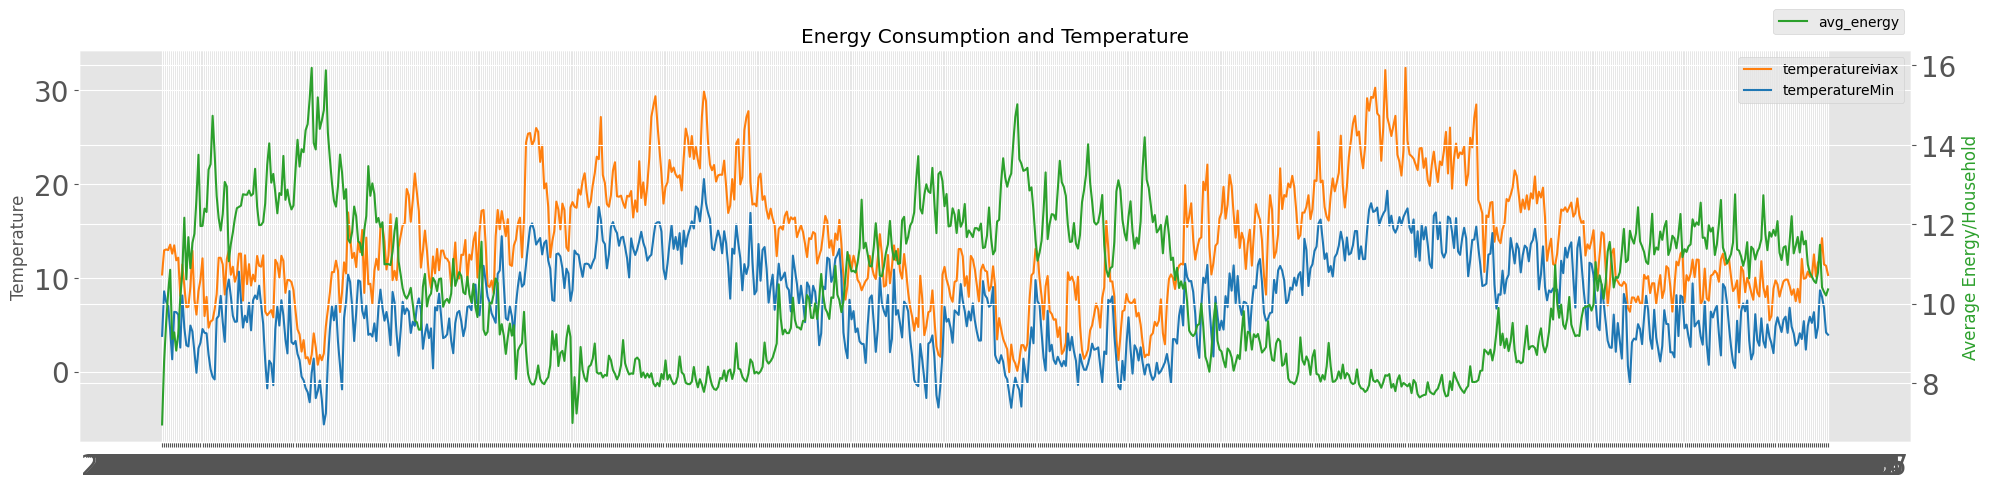

In [22]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.date, weather_energy.temperatureMax, color = 'tab:orange')
ax1.plot(weather_energy.date, weather_energy.temperatureMin, color = 'tab:blue')
ax1.set_ylabel('Temperature')
ax1.legend(("temperatureMax","temperatureMin"))
ax2 = ax1.twinx()
ax2.plot(weather_energy.date,weather_energy.avg_energy,color = 'tab:green',label="avg_energy")
ax2.set_ylabel('Average Energy/Household',color = 'tab:green')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()


***2.  Humidity ***

>  Humidity and the average consumption of energy seems to have the same trend.


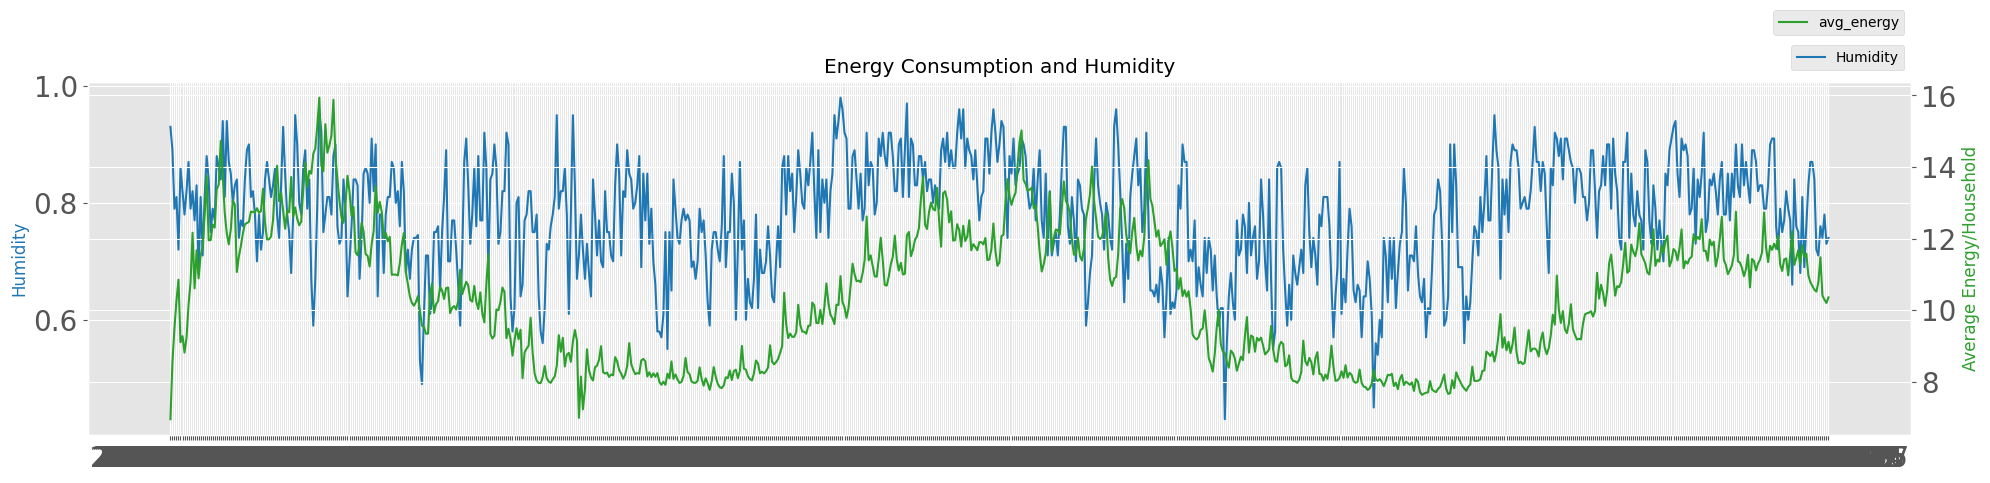

In [23]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.date, weather_energy.humidity, color = 'tab:blue',label="Humidity")
ax1.set_ylabel('Humidity',color = 'tab:blue')
ax1.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
ax2 = ax1.twinx()
ax2.plot(weather_energy.date,weather_energy.avg_energy,color = 'tab:green',label="avg_energy")
ax2.set_ylabel('Average Energy/Household',color = 'tab:green')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.202))
plt.title('Energy Consumption and Humidity')
fig.tight_layout()
plt.show()

***3. Cloud Cover***
> The cloud cover value seems to be following the same pattern as the energy consumption.

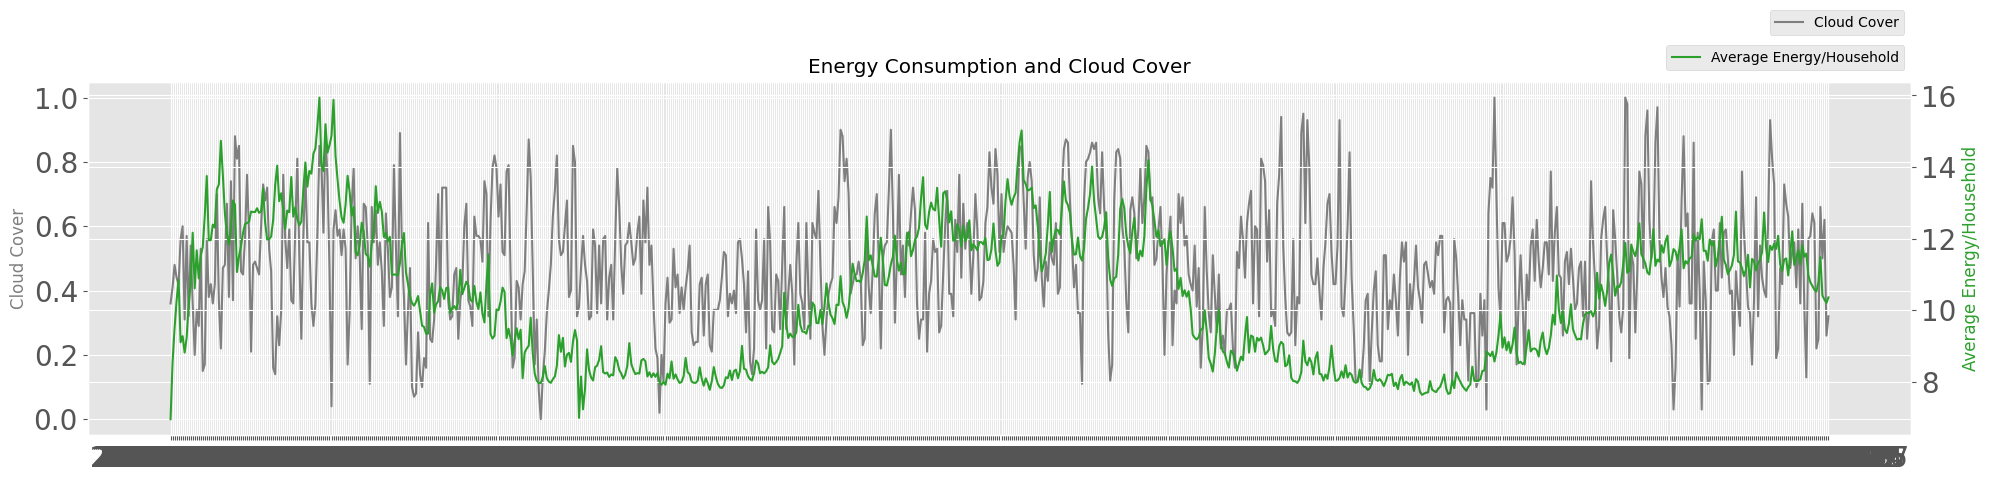

In [24]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.date, weather_energy.cloudCover, color = 'tab:grey',label="Cloud Cover")
ax1.set_ylabel('Cloud Cover',color = 'tab:grey')
ax1.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.202))
ax2 = ax1.twinx()
ax2.plot(weather_energy.date,weather_energy.avg_energy,color = 'tab:green',label="Average Energy/Household")
ax2.set_ylabel('Average Energy/Household',color = 'tab:green')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Cloud Cover')
fig.tight_layout()
plt.show()

***4. Visibility***
> The visibility factor does not seem to affect energy consumption at all- since visibility is most likely an outdoors factor, it is unlikely that it's increase or decrease affects energy consumption within a household.

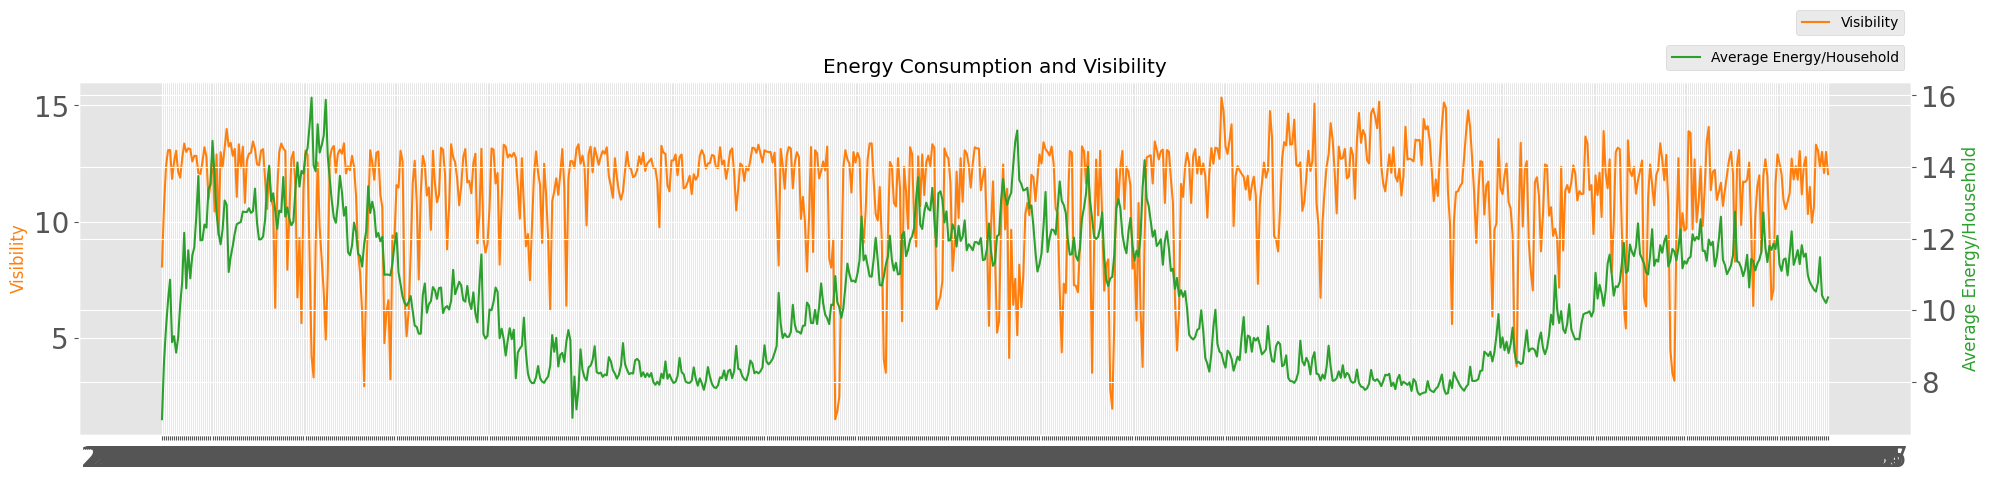

In [25]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.date, weather_energy.visibility, color = 'tab:orange',label="Visibility")
ax1.set_ylabel('Visibility',color = 'tab:orange')
ax1.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.202))
ax2 = ax1.twinx()
ax2.plot(weather_energy.date,weather_energy.avg_energy,color = 'tab:green',label="Average Energy/Household")
ax2.set_ylabel('Average Energy/Household',color = 'tab:green')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Visibility')
fig.tight_layout()
plt.show()

***5.  Wind Speed***
>  Like visibility, wind speed seems to be an outdoors factor which does not affect in the energy consumption as such.

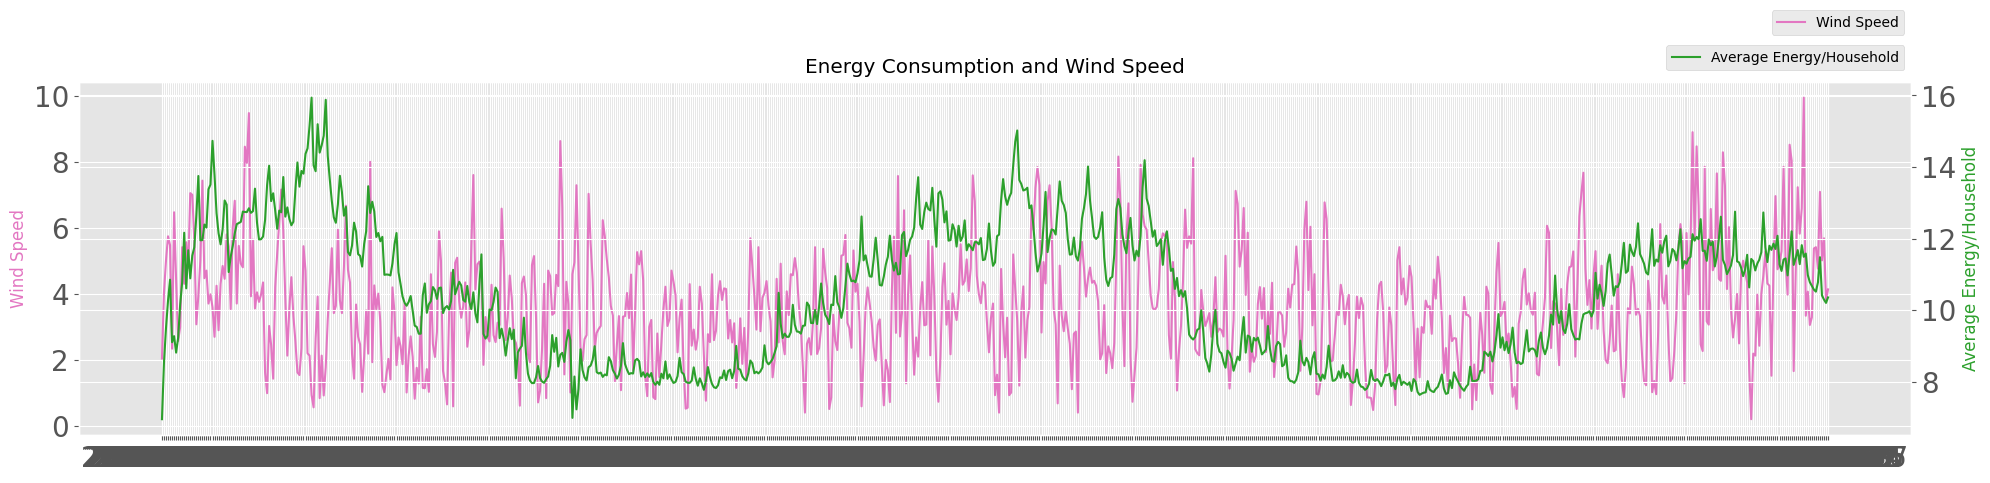

In [26]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.date, weather_energy.windSpeed, color = 'tab:pink',label="Wind Speed")
ax1.set_ylabel('Wind Speed',color = 'tab:pink')
ax1.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.202))
ax2 = ax1.twinx()
ax2.plot(weather_energy.date,weather_energy.avg_energy,color = 'tab:green',label="Average Energy/Household")
ax2.set_ylabel('Average Energy/Household',color = 'tab:green')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Wind Speed')
fig.tight_layout()
plt.show()

***6.  UV Index***
> The UV index has an inverse relationship with energy consumption

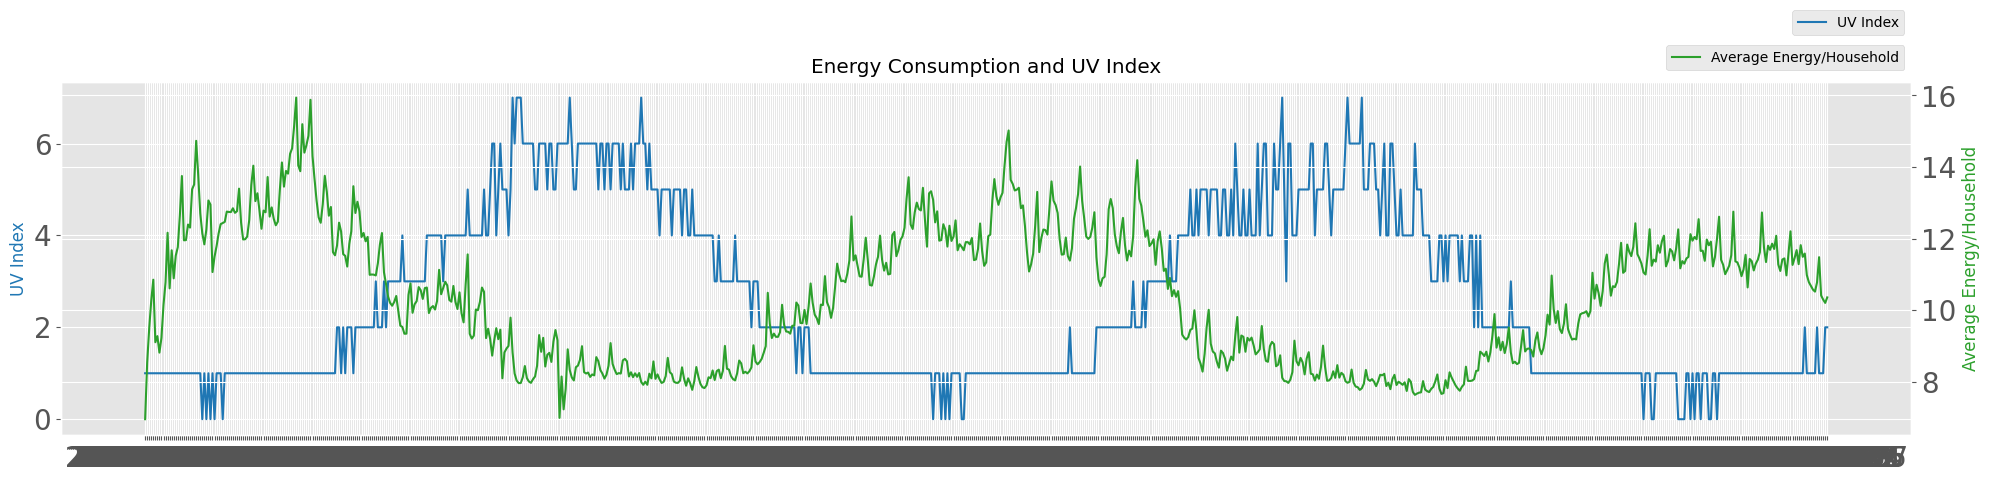

In [27]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.date, weather_energy.uvIndex, color = 'tab:blue',label="UV Index")
ax1.set_ylabel('UV Index',color = 'tab:blue')
ax1.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.202))
ax2 = ax1.twinx()
ax2.plot(weather_energy.date,weather_energy.avg_energy,color = 'tab:green',label="Average Energy/Household")
ax2.set_ylabel('Average Energy/Household',color = 'tab:green')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and UV Index')
fig.tight_layout()
plt.show()

***7. dewPoint***
> Dew Point- is a function of humidity and temperature therefore it displays similar relation to energy consumption.

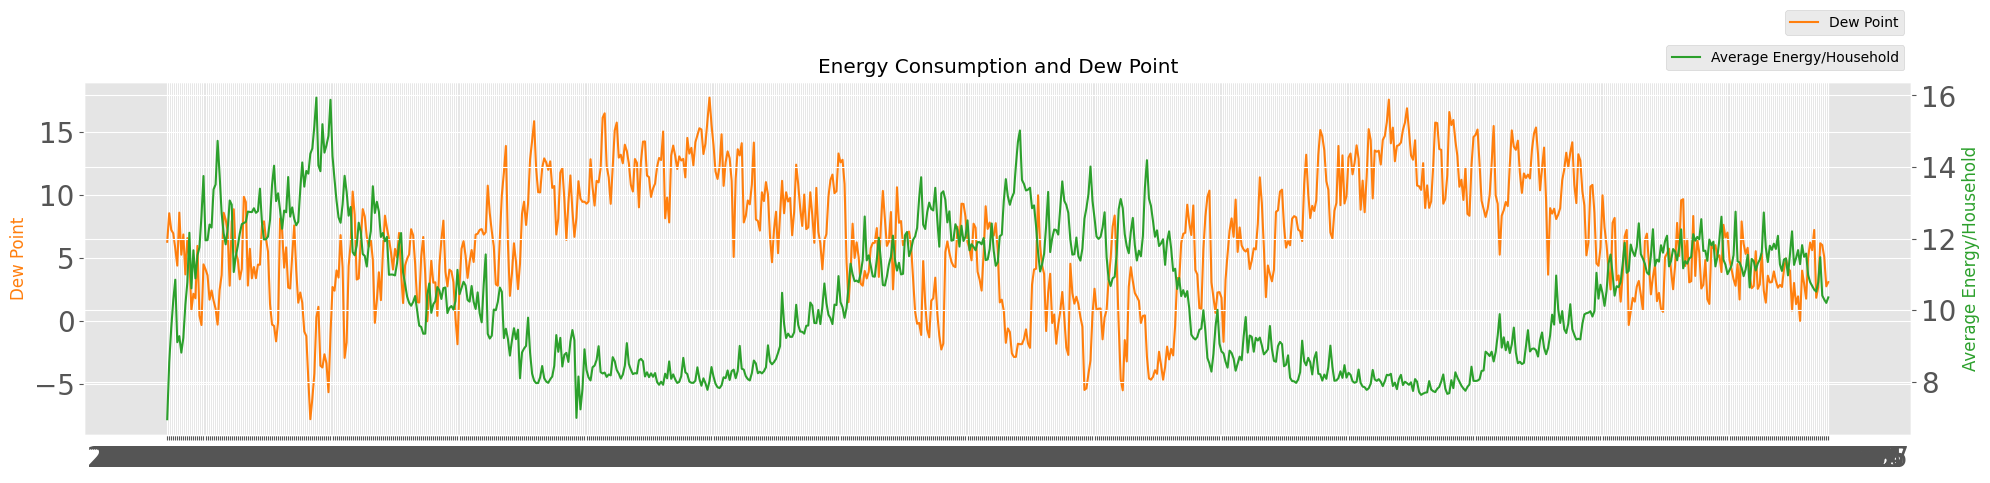

In [28]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.date, weather_energy.dewPoint, color = 'tab:orange',label="Dew Point")
ax1.set_ylabel('Dew Point',color = 'tab:orange')
ax1.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.202))
ax2 = ax1.twinx()
ax2.plot(weather_energy.date,weather_energy.avg_energy,color = 'tab:green',label="Average Energy/Household")
ax2.set_ylabel('Average Energy/Household',color = 'tab:green')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Dew Point')
fig.tight_layout()
plt.show()